In [1]:
import pandas as pd
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import seaborn as sns
from astropy.visualization import make_lupton_rgb
#plt.style.use('dark_background')

plt.rcParams["pdf.fonttype"] = 42  # Ensures text is stored as a TrueType font
plt.rcParams["font.family"] = "serif"  # Use a common font

In [2]:
data_zoo = pd.read_csv('data/complete_data.csv')

from mpl_toolkits.mplot3d import Axes3D
#%matplotlib inline
%matplotlib widget

# Calculate the size for the points
size = (data_zoo['average'] + [0.7]*len(data_zoo))**5.5

# Create a figure
fig = plt.figure(figsize=(10, 7))

# Add a 3D subplot
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
sc = ax.scatter(data_zoo['SINGLE'], data_zoo['K_SCORE'], data_zoo['score_sims'], 
                s=size.values, edgecolors='#00008B', facecolors='none', linewidth=1.)

# Set labels
ax.set_xlabel('Jimena')
ax.set_ylabel('Karina')
ax.set_zlabel('Jacobs')
ax.set_title('3D Scatter plot of beta test')

# Show plot
plt.show()


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [3]:
from mpl_toolkits.mplot3d import Axes3D
#%matplotlib inline
%matplotlib widget

data_tmp = data_zoo[data_zoo['average'] >= 1.75]


# Calculate the size for the points
size = (data_tmp['average'] + [0.5]*len(data_tmp))**5

# Create a figure
fig = plt.figure(figsize=(10, 7))

# Add a 3D subplot
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
sc = ax.scatter(data_tmp['SINGLE'], data_tmp['K_SCORE'], data_tmp['score_sims'], 
                s=size.values, edgecolors='#00008B', facecolors='none', linewidth=1.)

# Set labels
ax.set_xlabel('Jimena')
ax.set_ylabel('Karina')
ax.set_zlabel('Jacobs')
ax.set_title('3D Scatter plot of beta test')

# Show plot
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [4]:
filepath = '/Users/jimenagonzalez/research/DSPL/Citizen_science_project/Intersection/data/in_sled2.fits'
hdu_list = fits.open(filepath)
images = hdu_list[1].data
data = pd.DataFrame(hdu_list[2].data)
hdu_list.close()

data.replace('None', np.nan, inplace=True)
data = data.astype({'COADD_OBJECT_ID': int, 'K_RA': float, 'K_DEC': float, 'K_SCORE': float, 'Y3_COADD_OBJECT_ID': int,
       'J_RA': float, 'J_DEC': float, 'score_sims': float, 'score_real': float, 'score_both': float, 'G_RA': float,
       'G_DEC': float, 'SINGLE': float, 'RING': float, 'SMOOTH': float, 'COMPANIONS': float, 'SDSS_SPIRALS': float,
       'DES_SPIRALS': float, 'CROWDED': float, 'ARTIFACTS': float, 'MOST_NEGATIVES': float, 'index': int, 'ra': float,
       'dec': float, 'name': str, 'score': float, 'image_sep': float, 'info': str, 'n_img': float, 'flag': str,
       'image_conf': str, 'lens_type': str, 'source_type': str, 'contaminant_type': str, 'papers': str})

#Getting the images
data.set_index('COADD_OBJECT_ID', inplace=True)
data_zoo.set_index('COADD_OBJECT_ID', inplace=True)
# Reindex 'data' to match the index of 'data_zoo'
data = data.reindex(data_zoo.index)
# Reset index if needed
data.reset_index(inplace=True)
data_zoo.reset_index(inplace=True)
images = images[data.index]

print(len(images))

1651


In [5]:
def make_plot_all(objects, title, data, column_name):
    #print(title)
    for i in range(len(objects)):
        if(i%8 == 0):
            plt.figure(figsize=(16,9))
            for j in range(8):
                if(i+j > len(objects)-1): break
                plt.subplot(1,8,j+1)
                #print(data['COADD_OBJECT_ID'].iloc[i+j])
                new_title = 'Exp. Score: {:.1f}'.format(data[column_name].iloc[i+j])
                plt.title(new_title, fontsize=13)
                rgb = make_lupton_rgb(objects[i+j][2], objects[i+j][1], objects[i+j][0], Q=11., stretch=40.)
                rgb = np.flipud(rgb)
                plt.imshow(rgb, aspect='equal')
                plt.xticks([], [])
                plt.yticks([], []) 
            plt.savefig('Figures/' + title + '.png', bbox_inches='tight')
            plt.show()
            
            
def make_plot_all_brit(objects, title, data):
    #print(title)
    for i in range(len(objects)):
        if(i%8 == 0):
            plt.figure(figsize=(16,9))
            for j in range(8):
                if(i+j > len(objects)-1): break
                plt.subplot(1,8,j+1)
                #print(data['COADD_OBJECT_ID'].iloc[i+j])
                new_title = 'Grade: {:.3f}'.format(data['average'].iloc[i+j])
                plt.title(new_title)
                
                imager = 0.0005*objects[i+j][2] 
                imageg = 3*objects[i+j][1] 
                imageb = 15*objects[i+j][0] 
                rgb = np.array([imager, imageg, imageb])
                #Making sure values are lower or equal to 255
                rgb = np.clip(rgb, 0, 255).astype(np.uint8)
                rgb = rgb.transpose(1, 2, 0)
                #Increasing contrast
                min_img, max_img = np.min(rgb), np.max(rgb)     
                LUT=np.zeros(256,dtype=np.uint8)
                LUT[min_img:max_img+1]=np.linspace(start=0,stop=255,num=(max_img-min_img)+1,endpoint=True,dtype=np.uint8)
                rgb = LUT[rgb]
                rgb = np.flipud(rgb)
                
                #rgb = make_lupton_rgb(objects[i+j][2], objects[i+j][1], objects[i+j][0], Q=11., stretch=40.)
                #rgb = np.flipud(rgb)
                plt.imshow(rgb, aspect='equal')
                plt.xticks([], [])
                plt.yticks([], []) 
            plt.show()

In [6]:
#Sorting images in decresing average:

data_zoo = data_zoo.sort_values(by='average', ascending=False)
images = images[data_zoo.index]
data_zoo.reset_index(drop=True, inplace=True)

In [7]:
print(data_zoo.columns)

Index(['COADD_OBJECT_ID', 'K_RA', 'K_DEC', 'K_SCORE', 'Y3_COADD_OBJECT_ID',
       'J_RA', 'J_DEC', 'score_sims', 'score_real', 'score_both', 'G_RA',
       'G_DEC', 'SINGLE', 'RING', 'SMOOTH', 'COMPANIONS', 'SDSS_SPIRALS',
       'DES_SPIRALS', 'CROWDED', 'ARTIFACTS', 'MOST_NEGATIVES', 'index', 'ra',
       'dec', 'name', 'score', 'image_sep', 'info', 'n_img', 'flag',
       'image_conf', 'lens_type', 'source_type', 'contaminant_type', 'papers',
       '#subject_id', '#NEW_ID', '#image_name_1', '#image_name_2',
       '#image_name_3', '#image_name_4', '!Subject Type', 'Colours',
       'Size-in-arcsec', '#CLASS', 'Krojas26', 'sgonzalezloz', 'curiosorus',
       'ctortora', 'clarkguilty', 'anupreeta', 'alejandramelo', 'SUBJECT_ID',
       'average'],
      dtype='object')


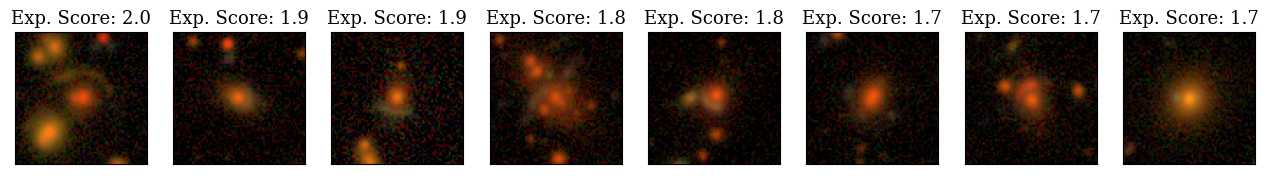

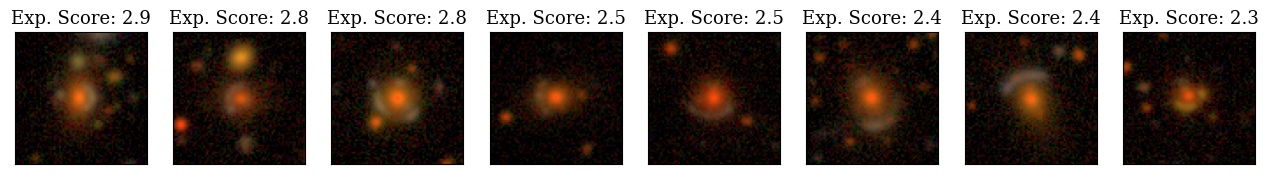

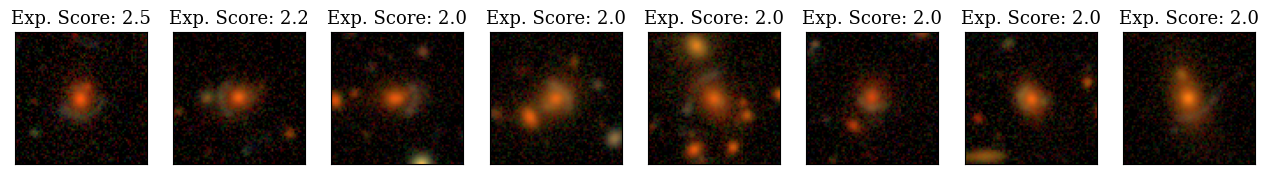

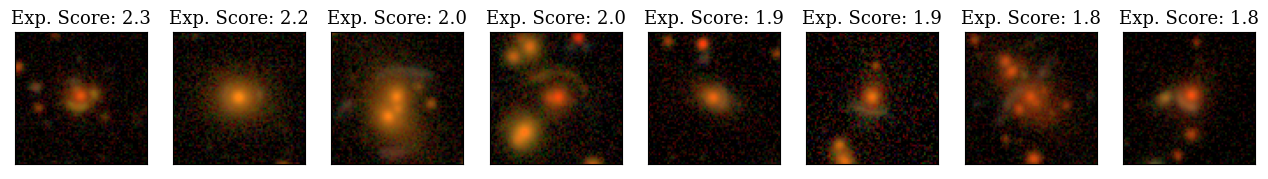

In [8]:
%matplotlib inline
n = 8

#Missed by all
data_tmp = data_zoo[(data_zoo['K_SCORE'] < 0.8) & (data_zoo['SINGLE'] < 0.8) & (data_zoo['score_sims'] < 0.8)]
images_tmp = images[data_tmp.index]
#print(len(data_tmp))
make_plot_all(images_tmp[0:n], 'all', data_tmp.iloc[0:n], 'average')
#make_plot_all_brit(images_tmp[0:n], 'title', data_tmp.iloc[0:n])

#Missed by Jacobs
data_tmp = data_zoo[data_zoo['score_sims'] < 0.8]
images_tmp = images[data_tmp.index]
#print(len(data_tmp))
make_plot_all(images_tmp[0:n], 'jacobs', data_tmp.iloc[0:n], 'average')
#make_plot_all_brit(images_tmp[0:n], 'title', data_tmp.iloc[0:n])

#Missed by Rojas
data_tmp = data_zoo[data_zoo['K_SCORE'] < 0.8]
images_tmp = images[data_tmp.index]
#print(len(data_tmp))
make_plot_all(images_tmp[0:n], 'rojas', data_tmp.iloc[0:n], 'average')
#make_plot_all_brit(images_tmp[0:n], 'title', data_tmp.iloc[0:n])

#Missed by Gonzalez
data_tmp = data_zoo[data_zoo['SINGLE'] < 0.8]
images_tmp = images[data_tmp.index]
#print(len(data_tmp))
make_plot_all(images_tmp[0:n], 'gonzalez', data_tmp.iloc[0:n], 'average')
#make_plot_all_brit(images_tmp[0:n], 'title', data_tmp.iloc[0:n])

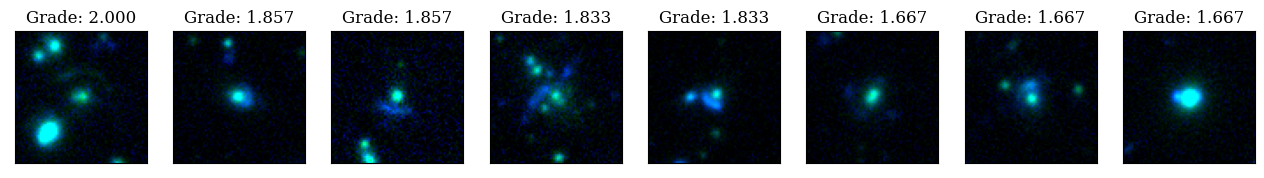

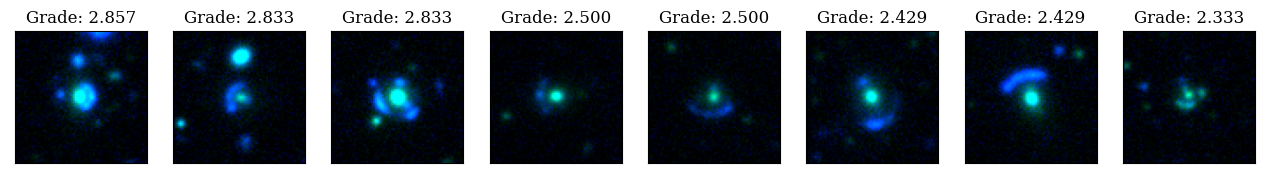

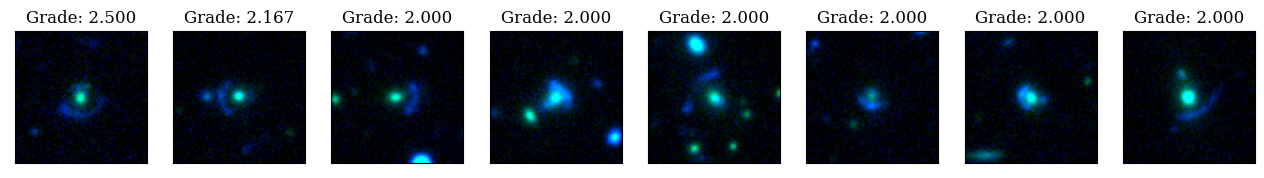

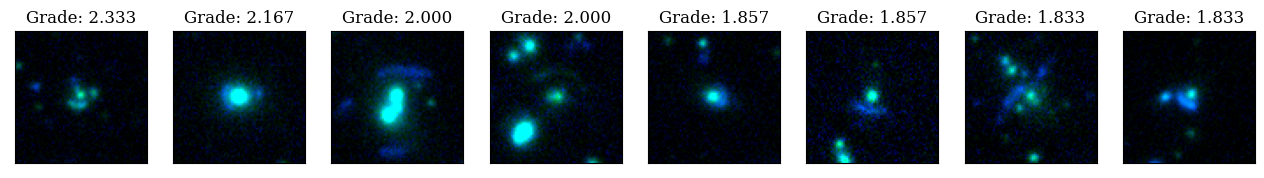

In [9]:
#Missed by all
data_tmp = data_zoo[(data_zoo['K_SCORE'] < 0.8) & (data_zoo['SINGLE'] < 0.8) & (data_zoo['score_sims'] < 0.8)]
images_tmp = images[data_tmp.index]
#print(len(data_tmp))
#make_plot_all(images_tmp[0:n], 'title', data_tmp.iloc[0:n])
make_plot_all_brit(images_tmp[0:n], 'title', data_tmp.iloc[0:n])

#Missed by Jacobs
data_tmp = data_zoo[data_zoo['score_sims'] < 0.8]
images_tmp = images[data_tmp.index]
#print(len(data_tmp))
#make_plot_all(images_tmp[0:n], 'title', data_tmp.iloc[0:n])
make_plot_all_brit(images_tmp[0:n], 'title', data_tmp.iloc[0:n])

#Missed by Rojas
data_tmp = data_zoo[data_zoo['K_SCORE'] < 0.8]
images_tmp = images[data_tmp.index]
#print(len(data_tmp))
#make_plot_all(images_tmp[0:n], 'title', data_tmp.iloc[0:n])
make_plot_all_brit(images_tmp[0:n], 'title', data_tmp.iloc[0:n])

#Missed by Gonzalez
data_tmp = data_zoo[data_zoo['SINGLE'] < 0.8]
images_tmp = images[data_tmp.index]
#print(len(data_tmp))
#make_plot_all(images_tmp[0:n], 'title', data_tmp.iloc[0:n])
make_plot_all_brit(images_tmp[0:n], 'title', data_tmp.iloc[0:n])

## Replying to Tom and Natalie

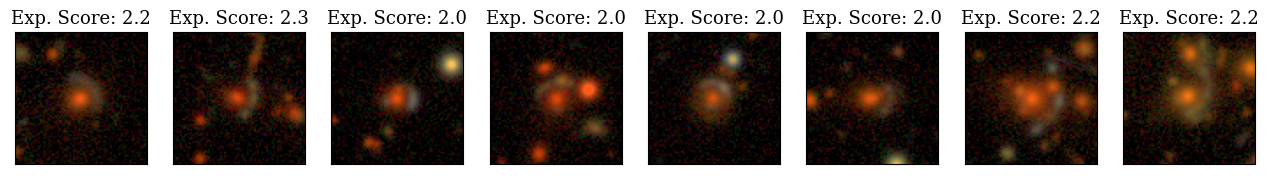

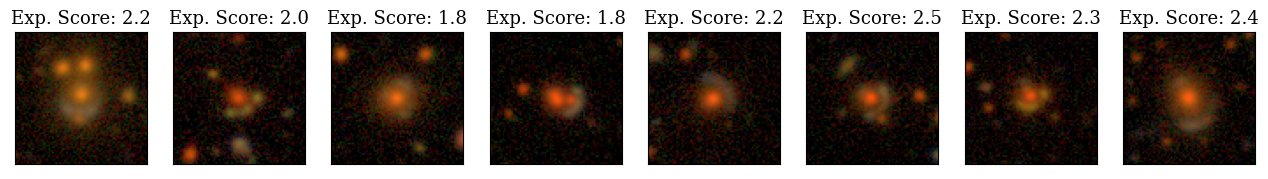

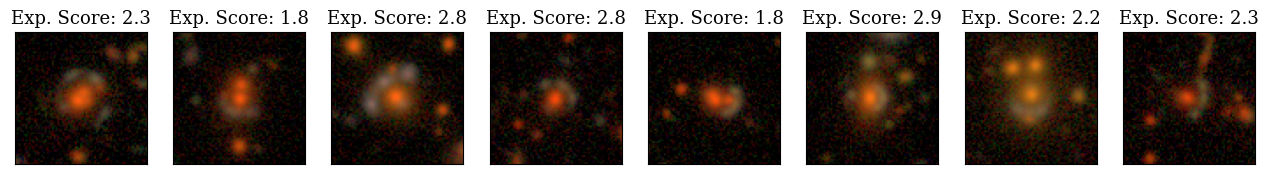

In [10]:
#High-confidence candidates (Exp. score > 1.75) that each ML model scored > 0.8

%matplotlib inline
n = 8

#Missed by Jacobs
data_tmp = data_zoo[data_zoo['score_sims'] > 0.8]
data_tmp = data_tmp[data_tmp['average'] > 1.75]
data_tmp = data_tmp.sort_values(by='score_sims', ascending=False)
images_tmp = images[data_tmp.index]
#print(len(data_tmp))
make_plot_all(images_tmp[0:n], 'jacobs', data_tmp.iloc[0:n], 'average')
#make_plot_all_brit(images_tmp[0:n], 'title', data_tmp.iloc[0:n])

#Missed by Rojas
data_tmp = data_zoo[data_zoo['K_SCORE'] > 0.8]
data_tmp = data_tmp[data_tmp['average'] > 1.75]
data_tmp = data_tmp.sort_values(by='K_SCORE', ascending=False)
images_tmp = images[data_tmp.index]
#print(len(data_tmp))
make_plot_all(images_tmp[0:n], 'rojas', data_tmp.iloc[0:n], 'average')
#make_plot_all_brit(images_tmp[0:n], 'title', data_tmp.iloc[0:n])

#Missed by Gonzalez
data_tmp = data_zoo[data_zoo['SINGLE'] > 0.8]
data_tmp = data_tmp[data_tmp['average'] > 1.75]
data_tmp = data_tmp.sort_values(by='SINGLE', ascending=False)
images_tmp = images[data_tmp.index]
#print(len(data_tmp))
make_plot_all(images_tmp[0:n], 'gonzalez', data_tmp.iloc[0:n], 'average')
#make_plot_all_brit(images_tmp[0:n], 'title', data_tmp.iloc[0:n])

74
1


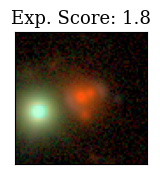

2


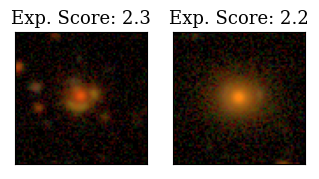

13


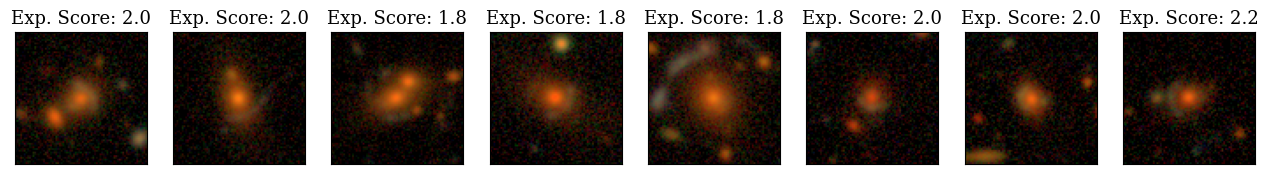

In [11]:
#High-confidence candidates (Exp. score > 0.8) that each ML model scored > 0.8, but removing all systems where
#both the other ML models also gave a score > 0.8

print(len(data_zoo[data_zoo['average'] > 1.75]))

%matplotlib inline
n = 8

#Missed by Jacobs
data_tmp = data_zoo[data_zoo['score_sims'] > 0.8]
data_tmp = data_tmp[data_tmp['average'] >= 1.75]
data_tmp = data_tmp[(data_tmp['SINGLE'] < 0.8) & (data_tmp['K_SCORE'] < 0.8)]
data_tmp = data_tmp.sort_values(by='score_sims', ascending=False)
print(len(data_tmp))
images_tmp = images[data_tmp.index]
#print(len(data_tmp))
make_plot_all(images_tmp[0:n], 'jacobs', data_tmp.iloc[0:n], 'average')
#make_plot_all_brit(images_tmp[0:n], 'title', data_tmp.iloc[0:n])

#Missed by Rojas
data_tmp = data_zoo[data_zoo['K_SCORE'] > 0.8]
data_tmp = data_tmp[data_tmp['average'] >= 1.75]
data_tmp = data_tmp[(data_tmp['SINGLE'] < 0.8) & (data_tmp['score_sims'] < 0.8)]
data_tmp = data_tmp.sort_values(by='K_SCORE', ascending=False)
print(len(data_tmp))
images_tmp = images[data_tmp.index]
#print(len(data_tmp))
make_plot_all(images_tmp[0:n], 'rojas', data_tmp.iloc[0:n], 'average')
#make_plot_all_brit(images_tmp[0:n], 'title', data_tmp.iloc[0:n])

#Missed by Gonzalez
data_tmp = data_zoo[data_zoo['SINGLE'] > 0.8]
data_tmp = data_tmp[data_tmp['average'] >= 1.75]
data_tmp = data_tmp[(data_tmp['K_SCORE'] < 0.8) & (data_tmp['score_sims'] < 0.8)]
data_tmp = data_tmp.sort_values(by='SINGLE', ascending=False)
print(len(data_tmp))
images_tmp = images[data_tmp.index]
#print(len(data_tmp))
make_plot_all(images_tmp[0:n], 'gonzalez', data_tmp.iloc[0:n], 'average')
#make_plot_all_brit(images_tmp[0:n], 'title', data_tmp.iloc[0:n])

74
16


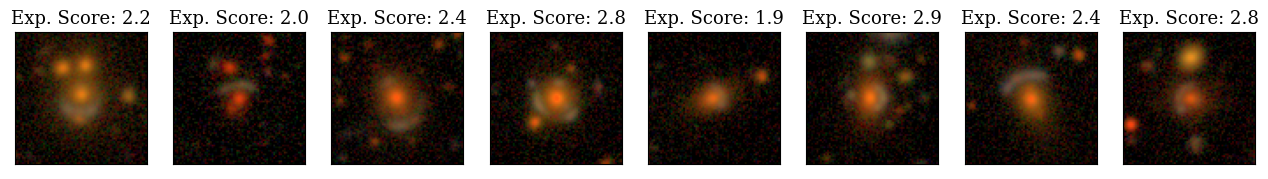

4


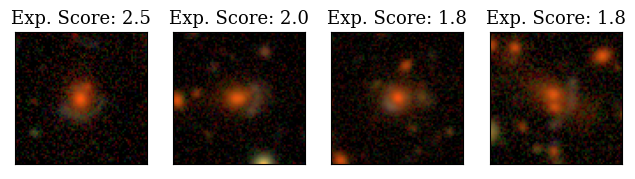

1


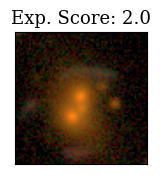

In [12]:
#Hig

print(len(data_zoo[data_zoo['average'] > 1.75]))

%matplotlib inline
n = 8

#Missed by Jacobs
data_tmp = data_zoo[data_zoo['score_sims'] < 0.8]
data_tmp = data_tmp[data_tmp['average'] >= 1.75]
data_tmp = data_tmp[(data_tmp['SINGLE'] > 0.8) & (data_tmp['K_SCORE'] > 0.8)]
data_tmp = data_tmp.sort_values(by='score_sims', ascending=False)
print(len(data_tmp))
images_tmp = images[data_tmp.index]
#print(len(data_tmp))
make_plot_all(images_tmp[0:n], 'jacobs', data_tmp.iloc[0:n], 'average')
#make_plot_all_brit(images_tmp[0:n], 'title', data_tmp.iloc[0:n])

#Missed by Rojas
data_tmp = data_zoo[data_zoo['K_SCORE'] < 0.8]
data_tmp = data_tmp[data_tmp['average'] >= 1.75]
data_tmp = data_tmp[(data_tmp['SINGLE'] > 0.8) & (data_tmp['score_sims'] > 0.8)]
data_tmp = data_tmp.sort_values(by='K_SCORE', ascending=False)
print(len(data_tmp))
images_tmp = images[data_tmp.index]
#print(len(data_tmp))
make_plot_all(images_tmp[0:n], 'rojas', data_tmp.iloc[0:n], 'average')
#make_plot_all_brit(images_tmp[0:n], 'title', data_tmp.iloc[0:n])

#Missed by Gonzalez
data_tmp = data_zoo[data_zoo['SINGLE'] < 0.8]
data_tmp = data_tmp[data_tmp['average'] >= 1.75]
data_tmp = data_tmp[(data_tmp['K_SCORE'] > 0.8) & (data_tmp['score_sims'] > 0.8)]
data_tmp = data_tmp.sort_values(by='SINGLE', ascending=False)
print(len(data_tmp))
images_tmp = images[data_tmp.index]
#print(len(data_tmp))
make_plot_all(images_tmp[0:n], 'gonzalez', data_tmp.iloc[0:n], 'average')
#make_plot_all_brit(images_tmp[0:n], 'title', data_tmp.iloc[0:n])

277
26


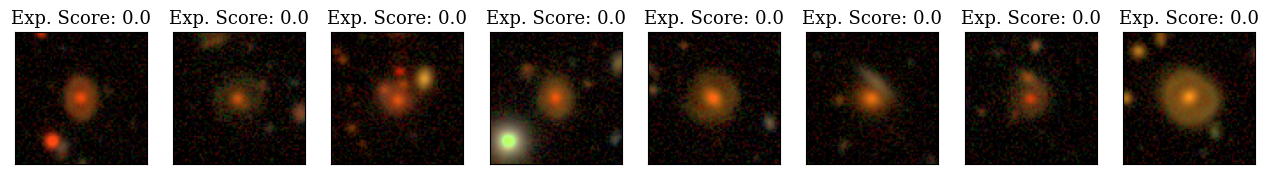

56


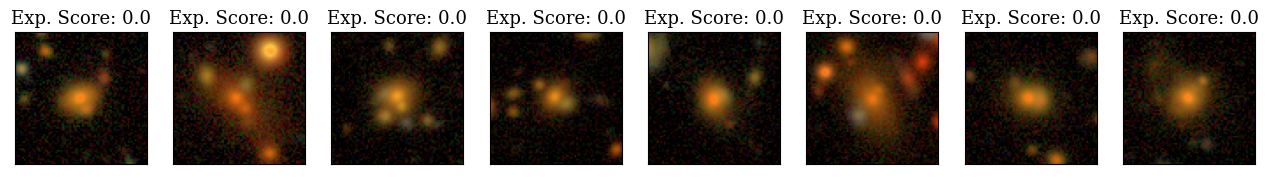

11


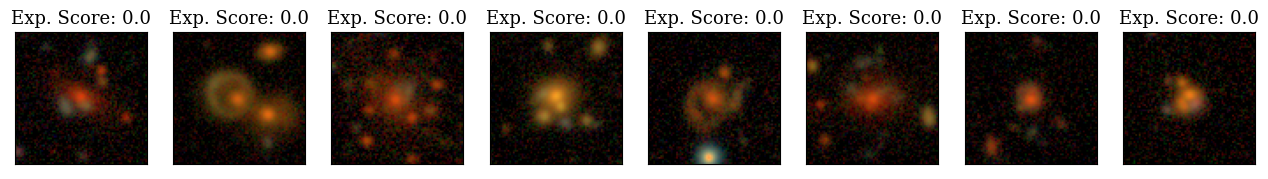

In [13]:
#worse False positves. ML > 0.8 & Exp. score < 0.5, ordered by ascending Exp. Score

print(len(data_zoo[data_zoo['average'] < 0.1]))

%matplotlib inline
n = 8

#Missed by Jacobs
data_tmp = data_zoo[data_zoo['score_sims'] > 0.8]
data_tmp = data_tmp[data_tmp['average'] < 0.1]
#data_tmp = data_tmp[(data_tmp['SINGLE'] > 0.8) & (data_tmp['K_SCORE'] > 0.8)]
data_tmp = data_tmp.sort_values(by='score_sims', ascending=False)
print(len(data_tmp))
images_tmp = images[data_tmp.index]
#print(len(data_tmp))
make_plot_all(images_tmp[0:n], 'jacobs', data_tmp.iloc[0:n], 'average')
#make_plot_all_brit(images_tmp[0:n], 'title', data_tmp.iloc[0:n])

#Missed by Rojas
data_tmp = data_zoo[data_zoo['K_SCORE'] > 0.8]
data_tmp = data_tmp[data_tmp['average'] < 0.1]
#data_tmp = data_tmp[(data_tmp['SINGLE'] > 0.8) & (data_tmp['score_sims'] > 0.8)]
data_tmp = data_tmp.sort_values(by='K_SCORE', ascending=False)
print(len(data_tmp))
images_tmp = images[data_tmp.index]
#print(len(data_tmp))
make_plot_all(images_tmp[0:n], 'rojas', data_tmp.iloc[0:n], 'average')
#make_plot_all_brit(images_tmp[0:n], 'title', data_tmp.iloc[0:n])

#Missed by Gonzalez
data_tmp = data_zoo[data_zoo['SINGLE'] > 0.8]
data_tmp = data_tmp[data_tmp['average'] < 0.1]
#data_tmp = data_tmp[(data_tmp['K_SCORE'] > 0.8) & (data_tmp['score_sims'] > 0.8)]
data_tmp = data_tmp.sort_values(by='SINGLE', ascending=False)
print(len(data_tmp))
images_tmp = images[data_tmp.index]
#print(len(data_tmp))
make_plot_all(images_tmp[0:n], 'gonzalez', data_tmp.iloc[0:n], 'average')
#make_plot_all_brit(images_tmp[0:n], 'title', data_tmp.iloc[0:n])
